# In this particular session, we will look at how to read Time Series data and look at various measures of decomposition of the Time Series data. We will also look at various exploratory data analysis measures for Time Series data.

# Case Study - We are going to analyse the data of monthly beer production of Australia in the $20^{th}$ century.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import os
os.chdir('D:/Academic Operations/DSBA - Python/Online/Time Series Forecasting/Mentored Learning Session/Week 1')
os.getcwd()

'D:\\Academic Operations\\DSBA - Python\\Online\\Time Series Forecasting\\Mentored Learning Session\\Week 1'

### Python allows us to read the data from a '.csv' file into a Time Series object in various ways. We are going to look at two ways to load Time Series data.

### Method 1:

In [2]:
df_1 = pd.read_csv("Beer Australia.csv",parse_dates=True,squeeze=True,index_col=0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17824\821056741.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df_1 = pd.read_csv("Beer Australia.csv",parse_dates=True,squeeze=True,index_col=0)


In [3]:
df_1.head()

Month
1956-01-01    93.2
1956-02-01    96.0
1956-03-01    95.2
1956-04-01    77.1
1956-05-01    70.9
Name: Monthly beer production, dtype: float64

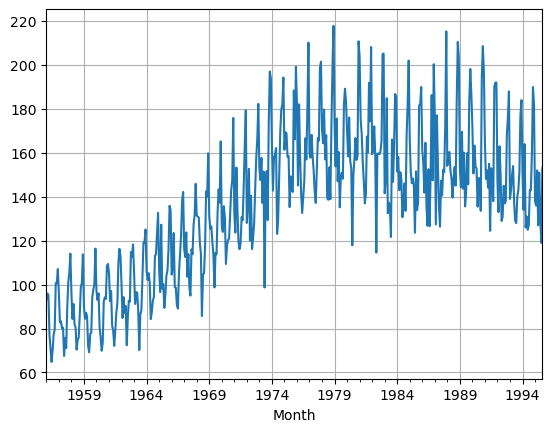

In [4]:
df_1.plot();
plt.grid()

### Method 2:

In [5]:
df_2 = pd.read_csv("Beer Australia.csv")

In [6]:
df_2.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


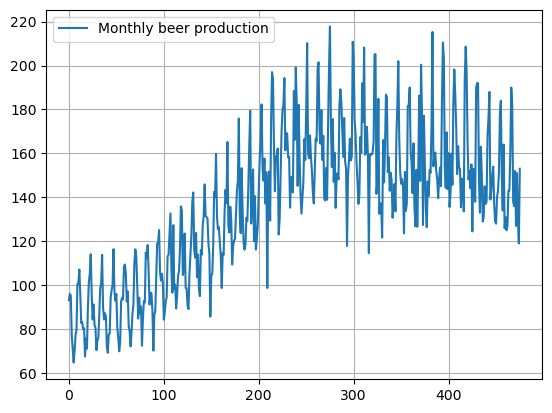

In [7]:
df_2.plot();
plt.grid()

Though the above plot looks like a Time Series plot, notice that the X-Axis is not time. In order to make the X-Axis as a Time Series, we need to pass the date range manually through a command in Pandas.

In [8]:
date = pd.date_range(start='1/1/1956', end='9/1/1995', freq='M')

The time stamps (in the above code snippet) is defined as a monthly Time Series after looking at the data. Please refer to the following documentation of the 'date_range' functionality in Pandas from $\href{https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html}{here}$.

In [9]:
date

DatetimeIndex(['1956-01-31', '1956-02-29', '1956-03-31', '1956-04-30',
               '1956-05-31', '1956-06-30', '1956-07-31', '1956-08-31',
               '1956-09-30', '1956-10-31',
               ...
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', length=476, freq='M')

In [10]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

,Month,Monthly beer production,Time_Stamp
0,1956-01,93.2,1956-01-31
1,1956-02,96.0,1956-02-29
2,1956-03,95.2,1956-03-31
3,1956-04,77.1,1956-04-30
4,1956-05,70.9,1956-05-31


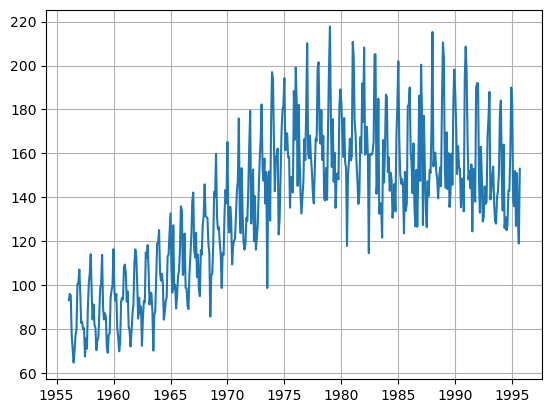

In [11]:
plt.plot(df_2['Time_Stamp'],df_2['Monthly beer production']);
plt.grid()

Now that we have seen how to load the data from a '.csv' file as a Time Series object, let us go ahead and analyse the Time Series plot that we got.

We notice that there is an increasing trend in the initial years which stabilizes as the years (or more specifically the months in each of the years) progresses. There is some kind of seasonality in the data as well.

# Find the mean and median of the monthly beer production.

In [12]:
df_1.describe()

count    476.000000
mean     136.395378
std       33.738725
min       64.800000
25%      112.900000
50%      139.150000
75%      158.825000
max      217.800000
Name: Monthly beer production, dtype: float64

In [13]:
df_2.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


# Get all the observations for all months for the year 1956.

The following is the code snippet to get all the particular observations from a particular year of interest.

In [14]:
df_1['1956']

Month
1956-01-01     93.2
1956-02-01     96.0
1956-03-01     95.2
1956-04-01     77.1
1956-05-01     70.9
1956-06-01     64.8
1956-07-01     70.1
1956-08-01     77.3
1956-09-01     79.5
1956-10-01    100.6
1956-11-01    100.7
1956-12-01    107.1
Name: Monthly beer production, dtype: float64

# Plot a year on year boxplot for the beer production.

Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


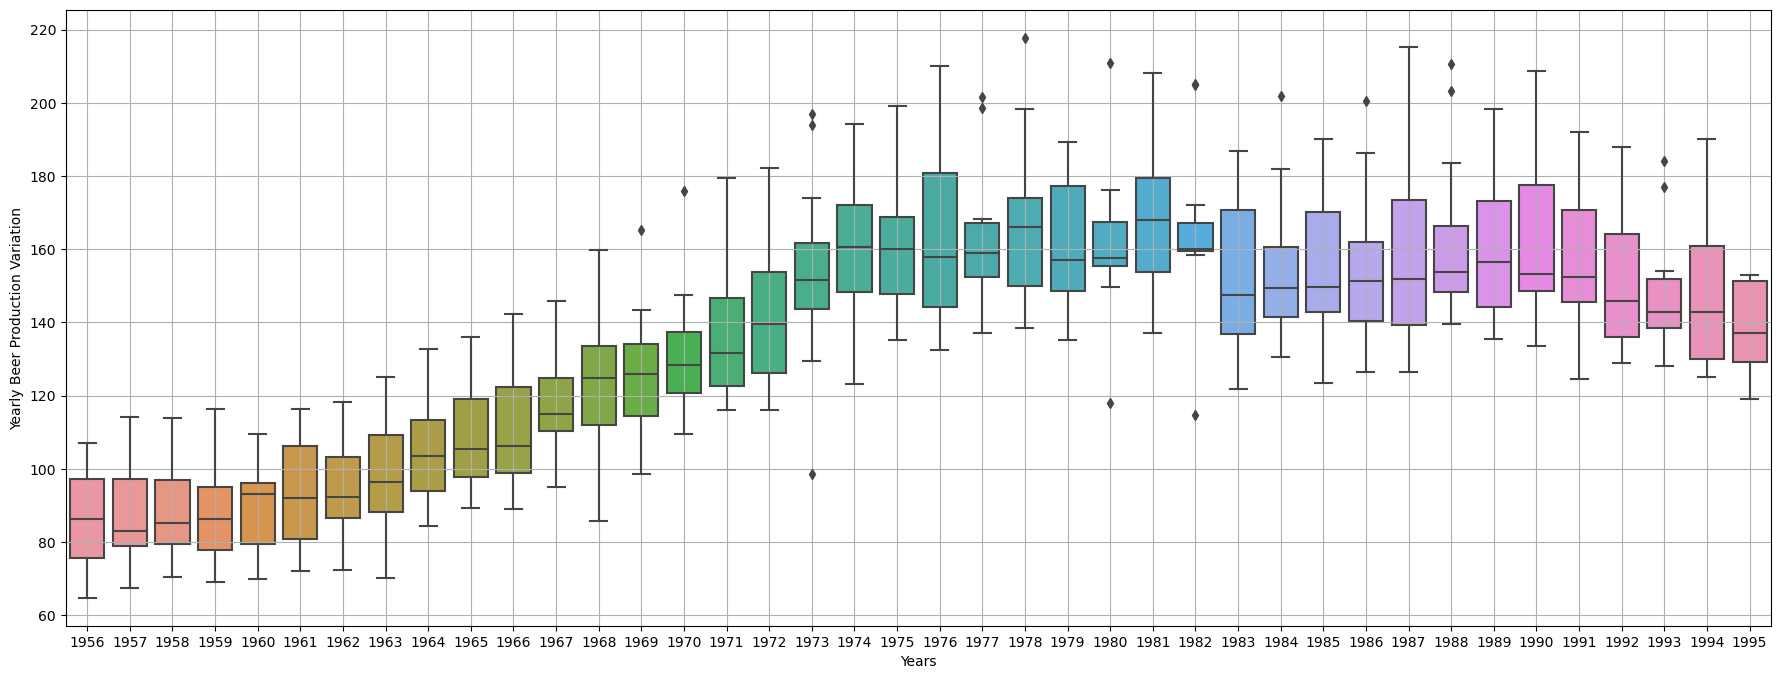

In [15]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Beer Production Variation');

As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that the production of beer has some outliers for certain years.

# Plot a monthly boxplot for the beer production taking all the years into account.

Since this is a monthly data, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers for every month across all the years, if any.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


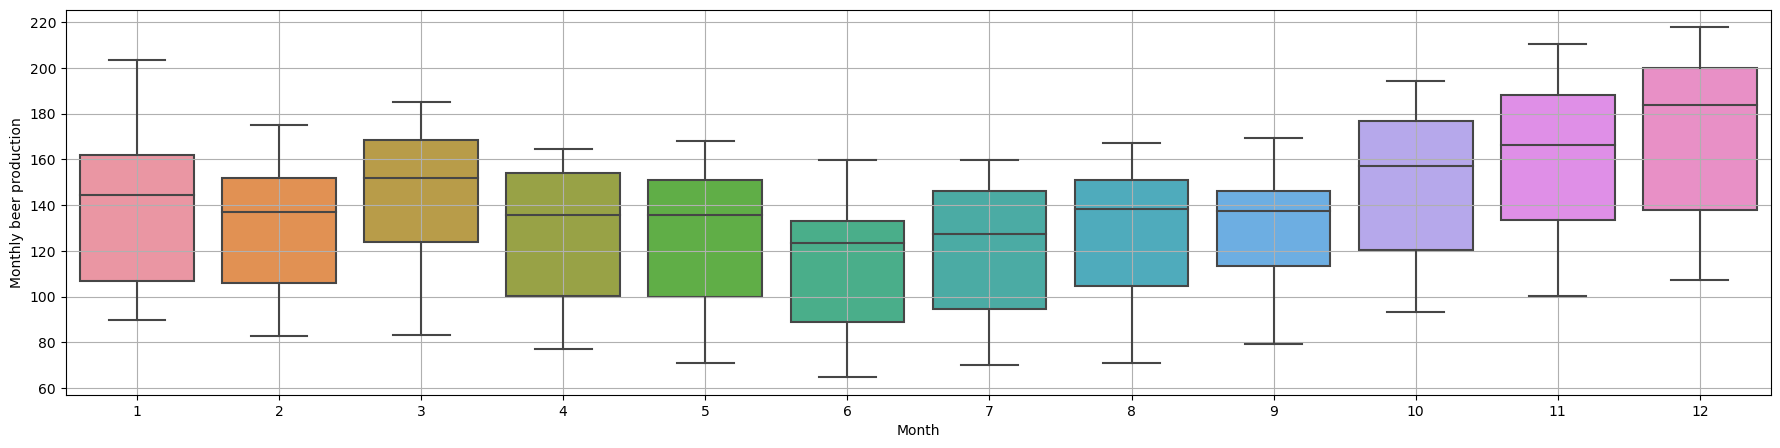

In [16]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();

The boxplots for the monthly production for different years does not show any outliers.

# Plot a monthplot of the give Time Series.

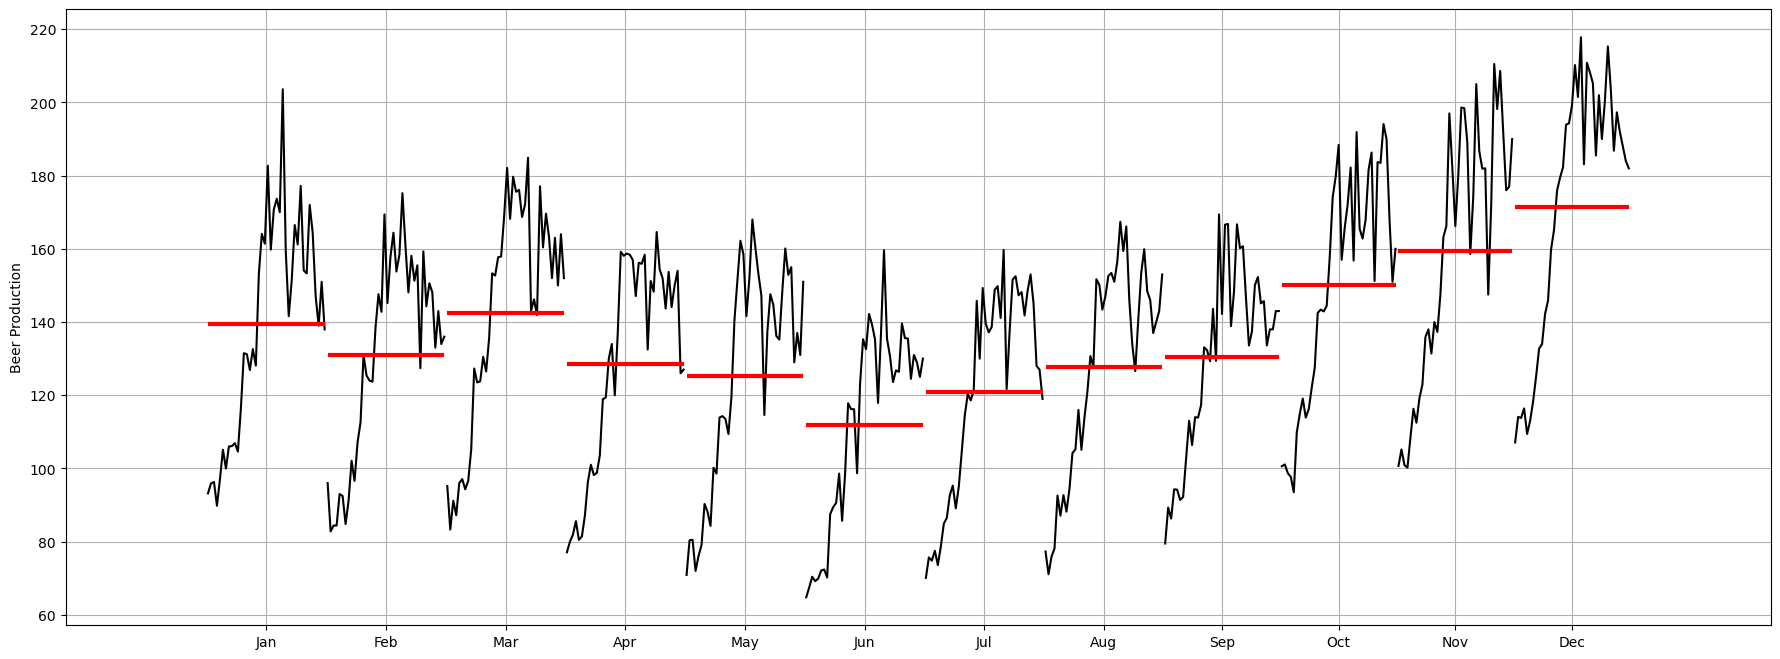

In [17]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='Beer Production',ax=ax)
plt.grid();

# Plot the Time Series according to different months for different years.

In [18]:
df_2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_2.head()

,Month,Monthly beer production
Time_Stamp,,
1956-01-31,1956-01,93.2
1956-02-29,1956-02,96.0
1956-03-31,1956-03,95.2
1956-04-30,1956-04,77.1
1956-05-31,1956-05,70.9


In [19]:
df_2.drop(labels='Month',inplace=True,axis=1)
df_2.head()

,Monthly beer production
Time_Stamp,
1956-01-31,93.2
1956-02-29,96.0
1956-03-31,95.2
1956-04-30,77.1
1956-05-31,70.9


In [20]:
df_2['Monthly beer production']

Time_Stamp
1956-01-31     93.2
1956-02-29     96.0
1956-03-31     95.2
1956-04-30     77.1
1956-05-31     70.9
              ...  
1995-04-30    127.0
1995-05-31    151.0
1995-06-30    130.0
1995-07-31    119.0
1995-08-31    153.0
Name: Monthly beer production, Length: 476, dtype: float64

In [21]:
yearly_sales_across_months = pd.pivot_table(df_2, values = 'Monthly beer production', columns = df_2.index.month, 
                                        index = df_2.index.year)

yearly_sales_across_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1956,93.2,96.0,95.2,77.1,70.9,64.8,70.1,77.3,79.5,100.6,100.7,107.1
1957,95.9,82.8,83.3,80.0,80.4,67.5,75.7,71.1,89.3,101.1,105.2,114.1
1958,96.3,84.4,91.2,81.9,80.5,70.4,74.8,75.9,86.3,98.7,100.9,113.8
1959,89.8,84.4,87.2,85.6,72.0,69.2,77.5,78.1,94.3,97.7,100.2,116.4
1960,97.1,93.0,96.0,80.5,76.1,69.9,73.6,92.6,94.2,93.5,108.5,109.4
1961,105.1,92.5,97.1,81.4,79.1,72.1,78.7,87.1,91.4,109.9,116.3,113.0
1962,100.0,84.8,94.3,87.1,90.3,72.4,84.9,92.7,92.2,114.9,112.5,118.3
1963,106.0,91.2,96.6,96.3,88.2,70.2,86.5,88.2,102.8,119.1,119.2,125.1
1964,106.1,102.1,105.2,101.0,84.3,87.5,92.7,94.4,113.0,113.9,122.9,132.7


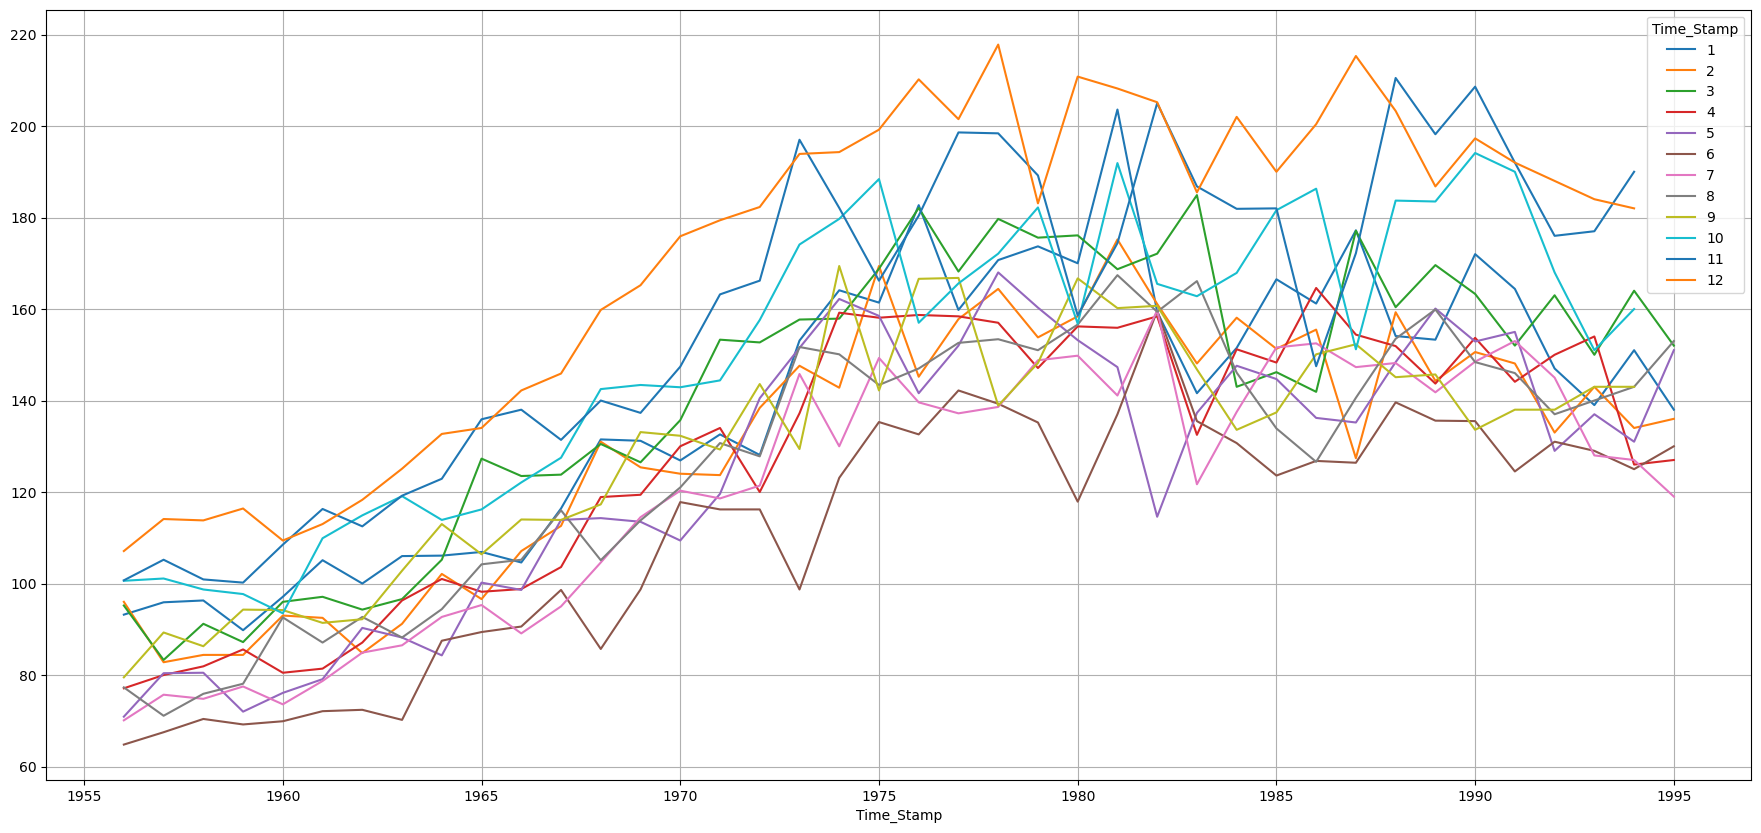

In [22]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

# Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.

### The concept of resampling will be covered in the video lectures of Second Week as well.

### Yearly Plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [23]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

Month
1956-12-31    1032.5
1957-12-31    1046.4
1958-12-31    1055.1
1959-12-31    1052.4
1960-12-31    1084.4
Freq: A-DEC, Name: Monthly beer production, dtype: float64

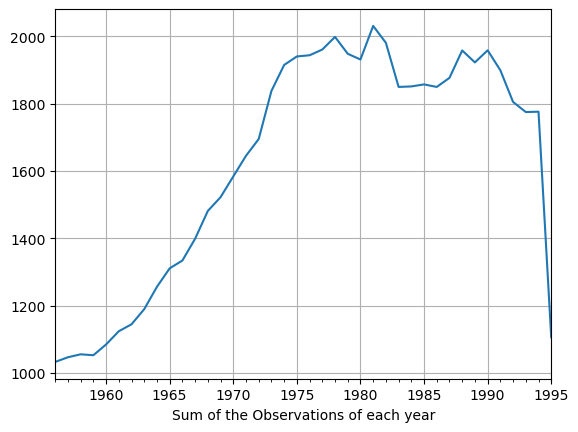

In [24]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [25]:
df_yearly_mean = df_1.resample('Y').mean()
df_yearly_mean.head()

Month
1956-12-31    86.041667
1957-12-31    87.200000
1958-12-31    87.925000
1959-12-31    87.700000
1960-12-31    90.366667
Freq: A-DEC, Name: Monthly beer production, dtype: float64

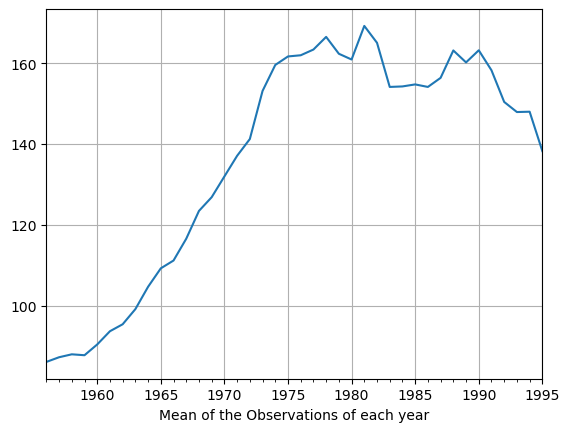

In [26]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

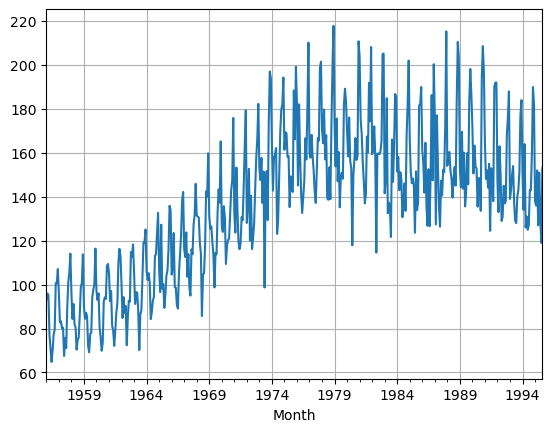

In [27]:
df_1.plot()
plt.grid();

The resampled yearly or annual series have smoothened out the seasonality and have only been able to capture the year on year trend where there was.

### Quarterly Plot

In [28]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

Month
1956-03-31    284.4
1956-06-30    212.8
1956-09-30    226.9
1956-12-31    308.4
1957-03-31    262.0
Freq: Q-DEC, Name: Monthly beer production, dtype: float64

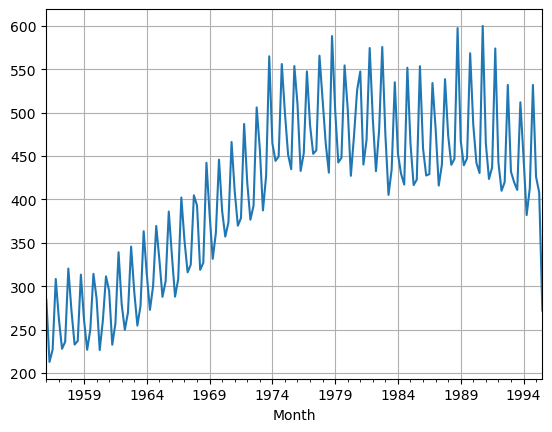

In [29]:
df_quarterly_sum.plot();
plt.grid()

In [30]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

Month
1956-03-31     94.800000
1956-06-30     70.933333
1956-09-30     75.633333
1956-12-31    102.800000
1957-03-31     87.333333
Freq: Q-DEC, Name: Monthly beer production, dtype: float64

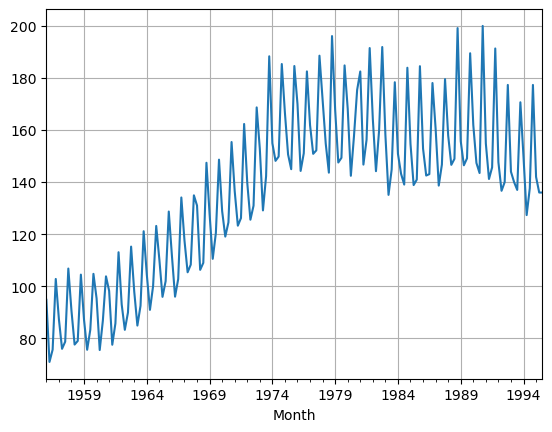

In [31]:
df_quarterly_mean.plot();
plt.grid()

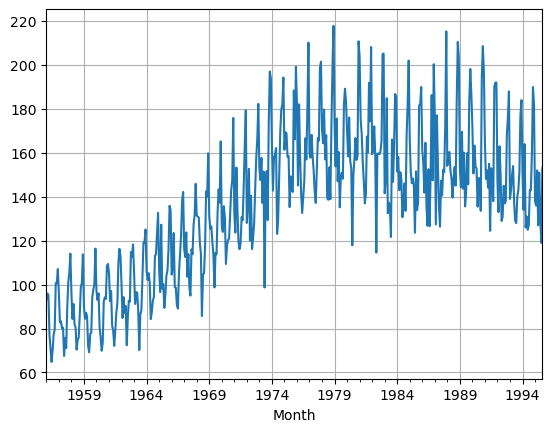

In [32]:
df_1.plot()
plt.grid();

We see that the year on year quarterly series represents the year on year monthly series. The quarterly series is able to catch the seasonality in the data.

### Daily Plot

Now, let us try to understand the data from a daily perspective.

In [33]:
df_daily_sum = df_1.resample('D').sum()
df_daily_sum

Month
1956-01-01     93.2
1956-01-02      0.0
1956-01-03      0.0
1956-01-04      0.0
1956-01-05      0.0
              ...  
1995-07-28      0.0
1995-07-29      0.0
1995-07-30      0.0
1995-07-31      0.0
1995-08-01    153.0
Freq: D, Name: Monthly beer production, Length: 14458, dtype: float64

The values which the original series cannot provide is taken as 0 by python if we try to resample the data on a daily basis.

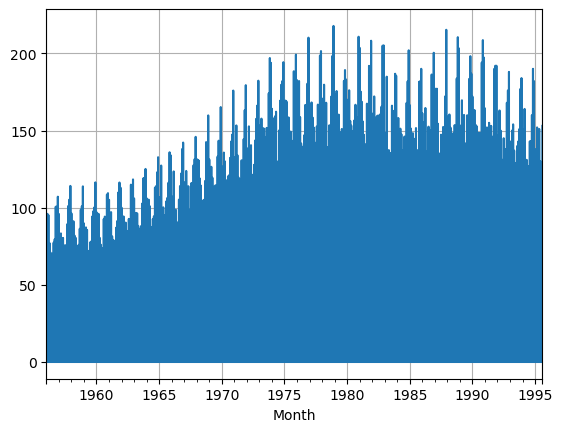

In [34]:
df_daily_sum.plot()
plt.grid();

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

### Decade Plot

In [35]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

Month
1956-12-31     1032.5
1966-12-31    11596.0
1976-12-31    16961.7
1986-12-31    19257.3
1996-12-31    16076.7
Freq: 10A-DEC, Name: Monthly beer production, dtype: float64

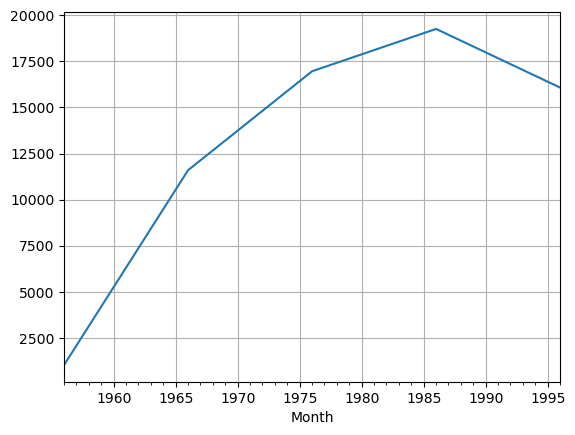

In [36]:
df_decade_sum.plot();
plt.grid()

If we take the resampling period to be 10 years or a decade, we see that the seasonality present has been smoothed over and it is only giving an estimate of the trend.

# Decompose the Time Series

### Additive Model

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

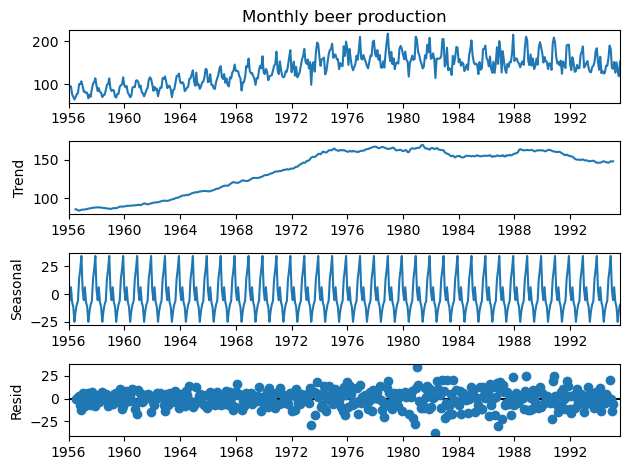

In [38]:
decomposition = seasonal_decompose(df_1,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well.

In [39]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [40]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Month
1956-01-01          NaN
1956-02-01          NaN
1956-03-01          NaN
1956-04-01          NaN
1956-05-01          NaN
1956-06-01          NaN
1956-07-01    86.154167
1956-08-01    85.716667
1956-09-01    84.670833
1956-10-01    84.295833
1956-11-01    84.812500
1956-12-01    85.320833
Name: trend, dtype: float64 

Seasonality 
 Month
1956-01-01     3.643172
1956-02-01    -5.500204
1956-03-01     6.215633
1956-04-01    -7.319126
1956-05-01   -11.503226
1956-06-01   -25.051691
1956-07-01   -15.491764
1956-08-01    -9.438772
1956-09-01    -6.113986
1956-10-01    13.536121
1956-11-01    22.602360
1956-12-01    34.421484
Name: seasonal, dtype: float64 

Residual 
 Month
1956-01-01          NaN
1956-02-01          NaN
1956-03-01          NaN
1956-04-01          NaN
1956-05-01          NaN
1956-06-01          NaN
1956-07-01    -0.562403
1956-08-01     1.022106
1956-09-01     0.943153
1956-10-01     2.768046
1956-11-01    -6.714860
1956-12-01   -12.642317
Name: resid, dtype: fl

In [41]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Month
1956-01-01          NaN
1956-02-01          NaN
1956-03-01          NaN
1956-04-01          NaN
1956-05-01          NaN
1956-06-01          NaN
1956-07-01    85.591764
1956-08-01    86.738772
1956-09-01    85.613986
1956-10-01    87.063879
1956-11-01    78.097640
1956-12-01    72.678516
dtype: float64

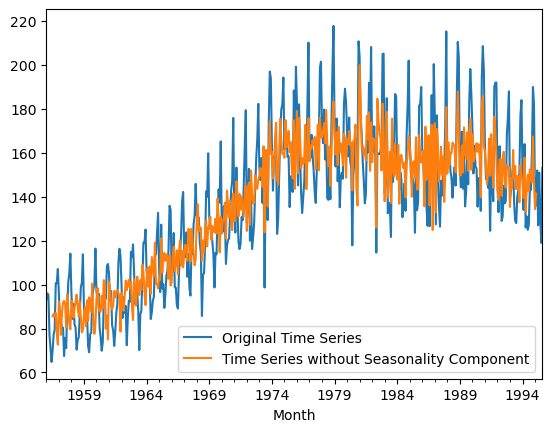

In [42]:
df_1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

# Missing Value Handling

Methods of imputation for replacing missing values (meaningful values)

| Method | When suitable |
| ---------------------------- | ------------------------------------ |
| Take average of the nearest neighbours | Data has no seasonality |
| Take average of the seasons from two or all available years | Data has seasonality |
| Interpolate function of pandas |  |
| Linear interpolation | Relationship in the interval of two samples is a first order polynomial |
| Polynomial such as Quadratic or Cubic interpolation | Second or third order polynomial describes the interval between two samples |
| Spline | Handles non-uniform spacing of samples |

This particular data does not contain any missing values. Let us try to insert a missing value and then impute it using the methods at our disposal.

We are going to replace the value '183.1' with a NaN value.

In [43]:
df_1['1979'].tail()

Month
1979-08-01    151.0
1979-09-01    148.2
1979-10-01    182.2
1979-11-01    189.2
1979-12-01    183.1
Name: Monthly beer production, dtype: float64

In [44]:
df_missing_value = df_1.replace(to_replace=183.1,value=np.NaN)

Let us check whether the value has been replaced with a NaN value.

In [45]:
df_missing_value.isna().sum()

1

We see that there is one missing value present.

Now, let us impute that with the methods at our disposal. The following are just a few methods to impute the missing values in the Time Series.

In [46]:
df_missing_value.interpolate()['1979'].tail()

Month
1979-08-01    151.0
1979-09-01    148.2
1979-10-01    182.2
1979-11-01    189.2
1979-12-01    179.6
Name: Monthly beer production, dtype: float64

We see that the newly imputed value is '179.6' compared to the old value of '183.1'.

In [47]:
df_missing_value.interpolate(method='spline',order=1)['1979'].tail()

Month
1979-08-01    151.000000
1979-09-01    148.200000
1979-10-01    182.200000
1979-11-01    189.200000
1979-12-01    179.531764
Name: Monthly beer production, dtype: float64

In [48]:
df_missing_value.interpolate(method='pad')['1979'].tail()

Month
1979-08-01    151.0
1979-09-01    148.2
1979-10-01    182.2
1979-11-01    189.2
1979-12-01    189.2
Name: Monthly beer production, dtype: float64

In [49]:
df_missing_value.interpolate(method='spline',order=3)['1979'].tail()

Month
1979-08-01    151.000000
1979-09-01    148.200000
1979-10-01    182.200000
1979-11-01    189.200000
1979-12-01    184.008257
Name: Monthly beer production, dtype: float64

For better understanding of the interpolate function for imputing the missing values, please refer to the documentation $\href{https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html}{here}$.

# END